# Import avocados dataset to COLAB enviroment

Ruben Dario Guarnizo Martinez <rguarnizo@unal.edu.co>

## 1. First method: Getting files

### 1.1 Download folder and upload into COLAB

For this method you need to go to the repository of scott anderson, [PyData Toolbox](https://github.com/ssanderson/pydata-toolbox), once there we will download the repository in zip format.

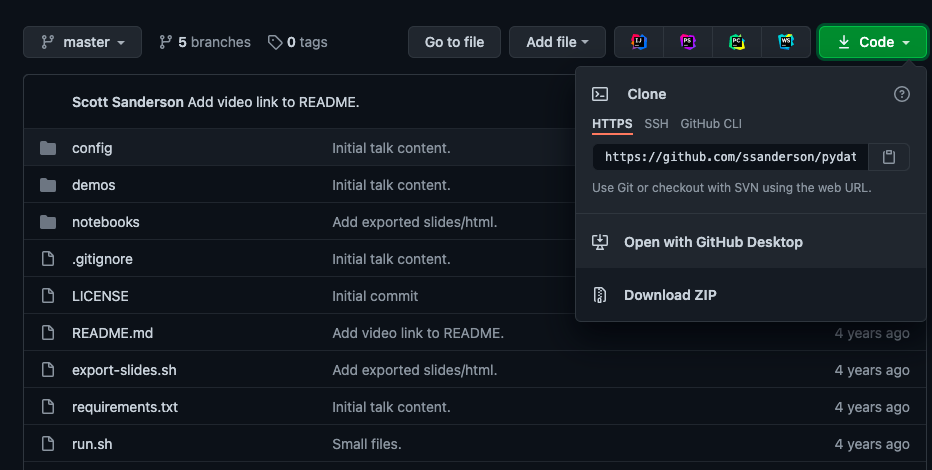

Already downloaded, it decompresses the file, go to the address where you decompressed it and search the folder demos and upload it into COLAB enviroment in a root directory.

### 1.2 Using git commands

The benefit of this method is that you will not have to download any repository file or up any file to the environment

In [ ]:
## Run this cell to test it
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 64 (delta 4), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (64/64), done.


With the command executed above 

```
!git clone <urlOfRepository>
```

 you can directly import all the repository to the environment, this will be found in the root folder.

But you need the folder demos to be in the root directory, Move the folder there.

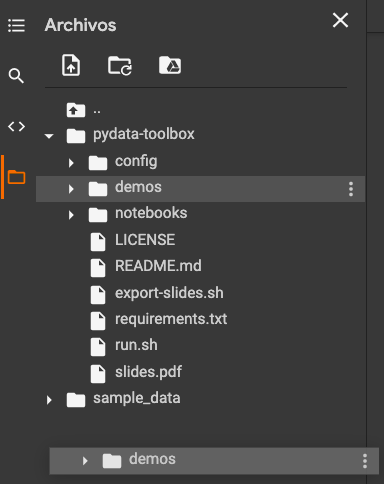

### 1.3 Using package Githubdl

The benefit of this method is that you will not have to bring all the repository, you will not have to move anything to any subdirectory, only get the folder you need.

If you like the command line (as to me), you can use this method to only bring the folder to the environment

In [ ]:
## Install package guthubdl, for documentation go http://githubdl.seso.io/
!pip install githubdl

In [ ]:
## To see how use it.
!githubdl

usage: githubdl [-h] (-f FILE | -d DIR | -a | -b) -u URL [-t TARGET]
                [-g GIT_TOKEN] [-l LOG_LEVEL] [-r REFERENCE] [-s]
githubdl: error: the following arguments are required: -u/--url


In [ ]:
## -u <url of repository> -d <directory to download> -g <GithubToken>
!githubdl -u https://github.com/ssanderson/pydata-toolbox -d demos -g 0260ccdcf10212d2a8f1d9ff6fbc7e55b00a4ad2

2021-03-15 21:53:10,377 - root         - INFO     - Retrieving a list of files for directory: demos
2021-03-15 21:53:10,377 - root         - INFO     - repo_name: ssanderson/pydata-toolbox api_path: contents request_string: /demos
2021-03-15 21:53:10,377 - root         - INFO     - Requesting file: demos at url: https://api.github.com/repos/ssanderson/pydata-toolbox/contents/demos
2021-03-15 21:53:10,478 - root         - INFO     - repo_name: ssanderson/pydata-toolbox api_path: contents request_string: /demos/__init__.py
2021-03-15 21:53:10,478 - root         - INFO     - Requesting file: demos/__init__.py at url: https://api.github.com/repos/ssanderson/pydata-toolbox/contents/demos/__init__.py
2021-03-15 21:53:10,593 - root         - INFO     - Checking for directory: demos
2021-03-15 21:53:10,593 - root         - INFO     - Creating directory: demos
2021-03-15 21:53:10,593 - root         - INFO     - Writing to file: demos/__init__.py
2021-03-15 21:53:10,593 - root         - INFO    

**Important**: For this method you will need to create a Github Token, this will only be done once until the token reaches the expiration date.

#### 1.3.1 Github Token

If you already have a Github access token, you do not need to do this step.

Go to your profile of Github and access the settings of your account.

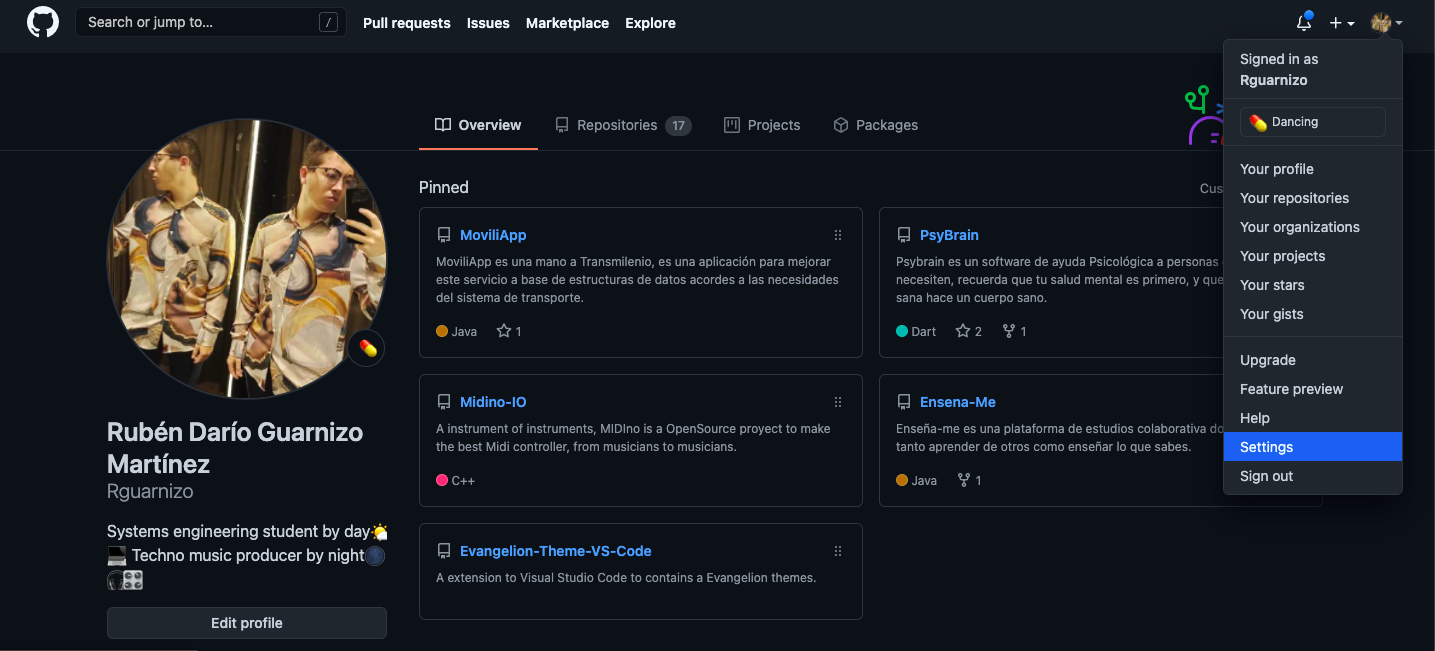

**Go to Settings / Developer settings / Personal access tokens**

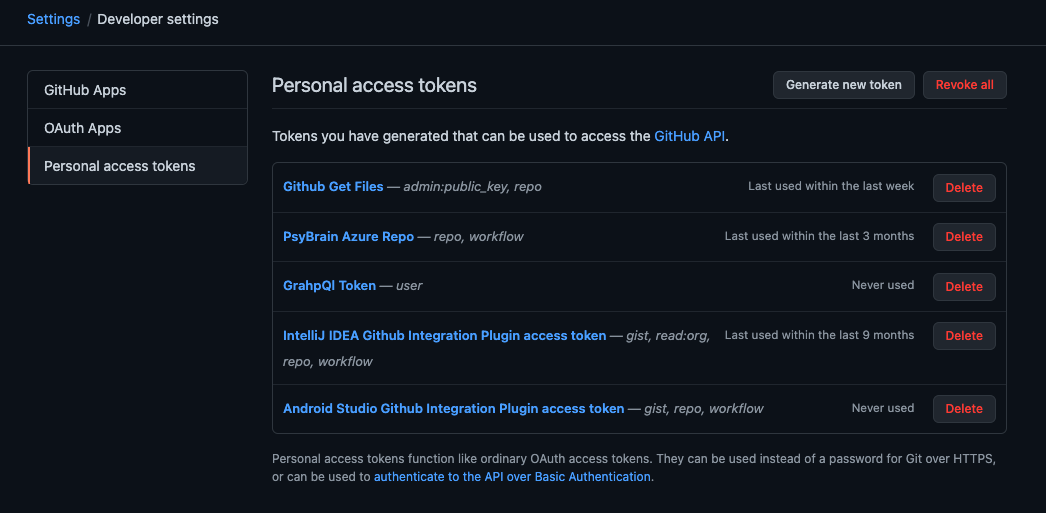

**Generate new Token, give a name, *You do not need to give you any permission or scopes*, and create it**

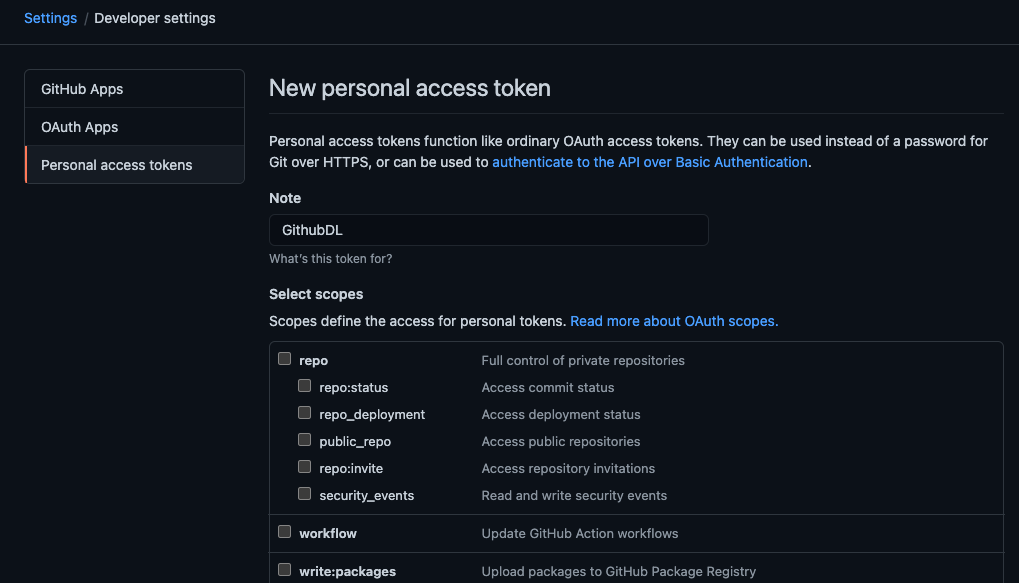

**Copy the access token and save it in a secure place, I recommend saving it as an environment variable on your computer**

**IMPORTANT: The access token only show you one time,That's why it's important that you keep it**

* Unix, GNU, Linux, MacOs: Save~`export varName=valueOfKey` Read ~`echo varName`
* Windows: Save~ `setx varName valueOfkey` Read ~`echo varName`

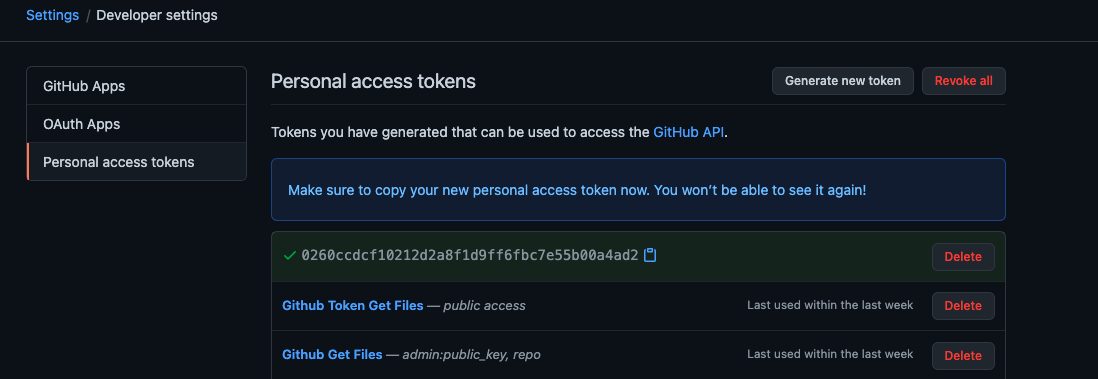

## 2. Second Method: API and Py Files

### 2.1 Import fuction read_avocados data 

Go to repository Scott Anderson [pydata-toolbox](https://github.com/ssanderson/pydata-toolbox), and go to directory demos, and open avocados.py, copy content and paste on the notebook:

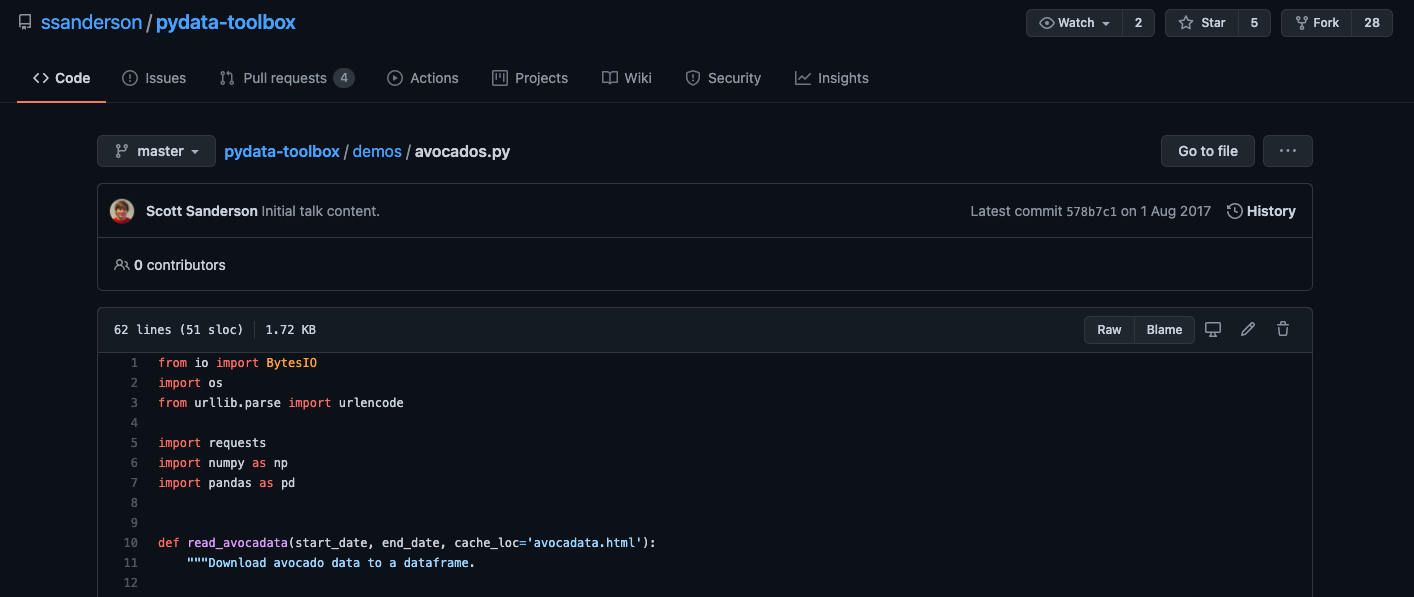

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )
    

We can already use the function to extract the avocados data.

### 2.2 Using API to get other data.

If we explore the code that is in the function we can see that it is an API Request to a direction associated with the United States Department of Agriculture.

To access parts of this information we need to pass some query parameters.

In [ ]:
## Needed Libraries.
from urllib.parse import urlencode 
import pandas as pd

import requests

## In this case, we will obtain TOMATOES data.
base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
query_params = {
  'class': ['VEGETABLES'], ## Change Fruit with Vegetables
  'commodity': ['TOMATOES'], ## Change Avocados with Tomatoes
  'compareLy': ['No'],
  'endDate': ['01/01/2021'], ## Hardcoding end Date
  'repDate': ['01/01/2020'], ## Hardcoding rep Date
  'format': ['excel'],
  'organic': ['ALL'],
  'portal': ['fv'],
  'region': ['ALL'],
  'type': ['retail'],
}

## Build URL to send request.
url = base_url + '?' + urlencode(query_params, doseq=1)

## Request data from url
resp = requests.get(url, stream=True)

## Create File with data.
with open('data.html', 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
            f.close()

## Read data from file.
tomatoes_data = pd.read_html('data.html', header=0)[0] 
## Be careful, this data is uncleaned, If you want to use it correctly, you will first have to clean it


## You now have data of tomatoes in the United States! Hurra!

In [ ]:
tomatoes_data

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,212,1.81,NaN,NaN,NaN
1,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,NaN,NaN,per pound,46,3.34,NaN,NaN,NaN
2,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,Y,NaN,per pound,23,3.99,NaN,NaN,NaN
3,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,NaN,NaN,per pound,2255,1.66,NaN,NaN,NaN
4,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,Y,Greenhouse,per pound,245,1.48,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,VINE RIPES,NaN,Greenhouse,per pound,10,2.49,2.49,2.49,NaN
1919,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,250,1.92,1.49,1.99,NaN
1920,01/01/2021,HAWAII,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,4,2.29,2.29,2.29,NaN
1921,01/01/2021,ALASKA,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,34,2.49,2.39,2.49,NaN


###2.3 Obtaining data by hand from USDA U.S. DEPARTMENT OF AGRICULTURE




If you are not familiar with Python or with programming, you can get the data you need if you enter the [page of market news of departament of agriculture of united states](https://www.marketnews.usda.gov/mnp/fv-report-retail?category=retail&portal=fv&startIndex=1&class=ALL&region=NATIONAL&organic=ALL&commodity=ALL&reportConfig=true&dr=1&repType=wiz&step2=true&run=Run&type=retail&commodityClass=allcommodity).

There you will find a graphic interface to put the parameters you want and download the data in the admitted formats

Also USDA avocado data by hand
US


Economic Research Service

https://www.ers.usda.gov

https://www.ers.usda.gov/data-products/agricultural-baseline-database/

Foreing
USDA U.S. DEPARTMENT OF AGRICULTURE

Foreing Agriculture Service

https://apps.fas.usda.gov https://apps.fas.usda.gov/esrquery/

Colombia included